In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Preprocessing and Transformation

## Considerations
- Selection of relevant features
- Selection of relevant instances
- Scales of measurements
  - Categoric
    - Nominal (e.g., gender or blood group) 
    - Ordinal (e.g., grades)
  - Numerical
    - Variant 1
      - Interval (e.g., degree Celsius)
      - Ratio (e.g., degree Kelvin)
    - Variant 2
       - Discrete (e.g., counts)
       - Continuous (e.g., height in cm)
- Data distribution


## Continuous Feature Transformation
### Motivation

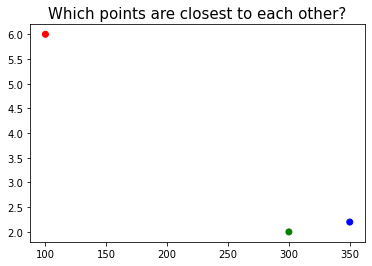

In [43]:
X = np.array([100,300,350])
Y = np.array([6,2,2.2])
plt.scatter(X,Y,c=["r","g","b"])
plt.title("Which points are closest to each other?",fontsize=15)
plt.show()

### Continuous Feature Transformation
- Important step to produce comparability
- Variants
  - Discretization 
  - Normalization 
    - Linear scaling to interval [0..1]
    - Logarithm scaling
    - z-Transformation (commonly used)
$$z_i = \frac{x_i - \bar{x}}{s}$$


## Data Cleaning
- Missing value treatment
  - Imputation (!)
  - Removing feature (if majority of instance values are missing)!
  - Removing instance (if majority of feature values are missing)

- Outlier detection
  - Simple approaches (e.g., boxplot/IQR-method)
  - Advanced approaches (e.g. local outlier factor)
  
  


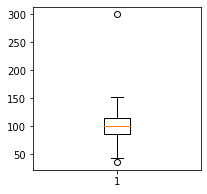

In [12]:
np.random.seed(123)
x = np.random.normal(100, 20, 200)
x = np.append(x, 300)
fig = plt.figure(figsize =(3, 3))
plt.boxplot(x)
plt.show()

## Data Reduction
- Sample reduction (sampling)
  - Reducing number of samples without falsifiying the result
  - Variants
     - Random Sampling
     - Cluster Sampling
     - Stratified Sampling

- Dimension reduction
  - Reduction of number of features
  - Removing "noisy" features



## Dimension Reduction
- Variants
  - Unsupervised
  - Supervised (Feature Selection)
- Advantages
  - Decreases computation costs of learning methods
  - Increases predictive ability of learning methods

## Unsupervised Dimension Reduction

Principal Components Analysis (PCA)
 - Idea: Projection to a lower dimension space (often 2 or 3) by conserving highest possible variance
- Calculation is based on eigenvalues and eigenvectors of covariance matrix (or correlation matrix)
 - Steps
   - Calculate covariance matrix C
   - Calculate eigenvectors ej and eigenvalues of C
   - Select k (often 2 or 3) eigenvectors with the corresponding highest eigenvalues
   - Transform objects into the new subspace
$$
x_i' = \sum_{j=1}^{d-k} (x_i e_j)
$$

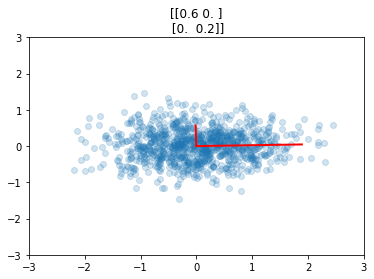

In [36]:
mu = [0,0]
sigma = [[0.6,0],[0,0.2]]
n = 1000
x = np.random.multivariate_normal(mu, sigma, n).T
C = np.cov(x)
e, v = np.linalg.eig(C)
plt.scatter(x[0,:], x[1,:], alpha=0.2)
for e_, v_ in zip(e, v.T):
    plt.plot([0, 3*e_*v_[0]], [0, 3*e_*v_[1]], 'r-', lw=2)
plt.axis([-3,3,-3,3])
plt.title(np.round(C,1));

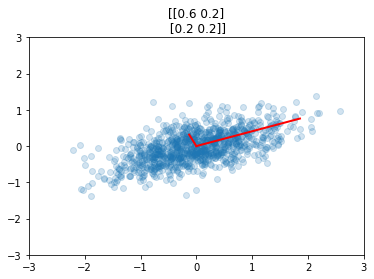

In [37]:
mu = [0,0]
sigma = [[0.6,0.2],[0.2,0.2]]
n = 1000
x = np.random.multivariate_normal(mu, sigma, n).T
C = np.cov(x)
e, v = np.linalg.eig(C)
plt.scatter(x[0,:], x[1,:], alpha=0.2)
for e_, v_ in zip(e, v.T):
    plt.plot([0, 3*e_*v_[0]], [0, 3*e_*v_[1]], 'r-', lw=2)
plt.axis([-3,3,-3,3])
plt.title(np.round(C,1));

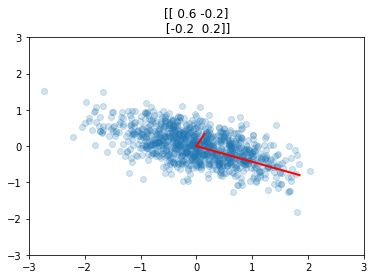

In [5]:
mu = [0,0]
sigma = [[0.6,-0.2],[-0.2,0.2]]
n = 1000
x = np.random.multivariate_normal(mu, sigma, n).T
C = np.cov(x)
e, v = np.linalg.eig(C)
plt.scatter(x[0,:], x[1,:], alpha=0.2)
for e_, v_ in zip(e, v.T):
    plt.plot([0, 3*e_*v_[0]], [0, 3*e_*v_[1]], 'r-', lw=2)
plt.axis([-3,3,-3,3])
plt.title(np.round(C,1));

## Unsupervised Dimension Reduction
### PCA Example

In [15]:
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", names=['sepal length','sepal width','petal length','petal width','target'])

In [11]:
iris.head()

sepal length  sepal width  petal length  petal width       target
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [18]:
X = iris.loc[:, ["sepal length", "sepal width", "petal length", "petal width"]].values

In [21]:
Xs = StandardScaler().fit_transform(X)

In [28]:
pca = PCA(n_components=2)
Xtr = pca.fit_transform(X)
Xt_df = pd.DataFrame(data = Xtr
             , columns = ['principal component 1', 'principal component 2'])
Xtry = pd.concat([Xt_df, df[['target']]], axis = 1)

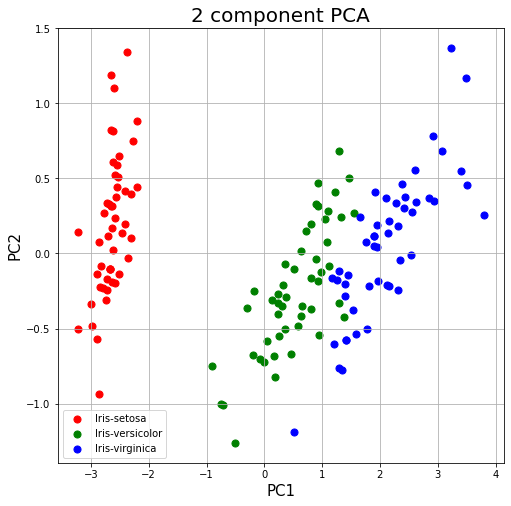

In [29]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel("PC1", fontsize = 15)
ax.set_ylabel("PC2", fontsize = 15)
ax.set_title("2 component PCA", fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = Xtry['target'] == target
    ax.scatter(Xtry.loc[indicesToKeep, 'principal component 1']
               , Xtry.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [30]:
pca.explained_variance_ratio_

array([0.92461621, 0.05301557])

## Supervised Dimension Reduction
- Filter
  - Calculate a score for every feature representing its discriminatory ability
  - Dimension reduction using thresholds or ranking of features
- Wrapper
  - Search a subset of features with high discriminatory ability using a search strategy that is "wrapped" around a learning algorithm.
  - Space of feature subsets grows exponentially with number of features $\rightarrow$ heuristic search strategy required
  - Forward- or Backward-selectionon, Genetic Algorithms ...
- Embedded
  - The search of an optimal feature subset is built into the model construction (e.g., Decision Tree)
- Further approaches (hybrid, ensemble, network-based)
